In [158]:
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [159]:
# Database connection parameters
db_params = {
    'host': 'branchhomeworkdb.cv8nj4hg6yra.ap-south-1.rds.amazonaws.com',
    'port': 5432,
    'database': 'branchdsprojectgps',
    'user': 'datascientist',
    'password': '47eyYBLT0laW5j9U24Uuy8gLcrN'
}

# Establish connection
conn = psycopg2.connect(**db_params)

# Load data from the tables
loan_outcomes = pd.read_sql('SELECT * FROM loan_outcomes;', conn)
gps_fixes = pd.read_sql('SELECT * FROM gps_fixes;', conn)
user_attributes = pd.read_sql('SELECT * FROM user_attributes;', conn)

# Close the connection
conn.close()


<ipython-input-159-3a26e864c0c9>:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  loan_outcomes = pd.read_sql('SELECT * FROM loan_outcomes;', conn)
<ipython-input-159-3a26e864c0c9>:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  gps_fixes = pd.read_sql('SELECT * FROM gps_fixes;', conn)
<ipython-input-159-3a26e864c0c9>:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  user_attributes = pd.read_sql('SELECT * FROM user_attributes;', conn)


In [160]:
print("Loan Outcomes DataFrame Shape:", loan_outcomes.shape)
print("Loan Outcomes Columns:", loan_outcomes.columns.tolist())

Loan Outcomes DataFrame Shape: (400, 3)
Loan Outcomes Columns: ['user_id', 'application_at', 'loan_outcome']


In [161]:
print("GPS Fixes DataFrame Shape:", gps_fixes.shape)
print("GPS Fixes Columns:", gps_fixes.columns.tolist())

GPS Fixes DataFrame Shape: (26710, 9)
GPS Fixes Columns: ['gps_fix_at', 'server_upload_at', 'longitude', 'latitude', 'accuracy', 'altitude', 'bearing', 'location_provider', 'user_id']


In [162]:
print("User Attributes DataFrame Shape:", user_attributes.shape)
print("User Attributes Columns:", user_attributes.columns.tolist())

User Attributes DataFrame Shape: (400, 3)
User Attributes Columns: ['user_id', 'age', 'cash_incoming_30days']


In [163]:
loan_outcomes.head()

,user_id,application_at,loan_outcome
0,1,2017-08-14 09:08:50.000000,defaulted
1,2,2016-05-17 10:10:12.447976,repaid
2,3,2016-10-20 10:07:20.459081,defaulted
3,4,2017-01-13 13:03:34.000000,defaulted
4,5,2016-11-03 15:41:39.124610,repaid


In [164]:
gps_fixes.head()

,gps_fix_at,server_upload_at,longitude,latitude,accuracy,altitude,bearing,location_provider,user_id
0,2017-06-22 09:37:20,2017-06-22 09:43:42,36.840540,-1.294342,68.4,0.0,0.0,fused,1
1,2017-08-14 07:50:27,2017-08-14 09:05:27,36.895270,-1.341928,1409.0,0.0,0.0,fused,1
2,2017-06-13 10:34:29,2017-06-13 10:54:48,36.811903,-1.307220,68.4,0.0,0.0,fused,1
3,2017-06-18 12:16:20,2017-06-18 12:16:24,36.907049,-1.309984,1581.0,0.0,0.0,fused,1
4,2017-06-28 09:39:08,2017-06-28 09:58:12,36.839396,-1.280310,1396.0,0.0,0.0,fused,1


In [165]:
user_attributes.head()

,user_id,age,cash_incoming_30days
0,1,42,8988.12
1,2,36,9968.12
2,3,27,59.04
3,4,38,2129.03
4,5,33,2102.53


In [166]:
print("Missing values in Loan Outcomes:")
print(loan_outcomes.isnull().sum())

print("Missing values in GPS Fixes:")
print(gps_fixes.isnull().sum())

print("Missing values in User Attributes:")
print(user_attributes.isnull().sum())

Missing values in Loan Outcomes:
user_id           0
application_at    0
loan_outcome      0
dtype: int64
Missing values in GPS Fixes:
gps_fix_at           0
server_upload_at     0
longitude            0
latitude             0
accuracy             0
altitude             0
bearing              0
location_provider    0
user_id              0
dtype: int64
Missing values in User Attributes:
user_id                 0
age                     0
cash_incoming_30days    0
dtype: int64


In [167]:
loan_outcomes.describe(include='all')

,user_id,application_at,loan_outcome
count,400.000000,400,400
unique,NaN,NaN,2
top,NaN,NaN,defaulted
freq,NaN,NaN,200
mean,200.500000,2017-08-02 04:03:22.879437312,NaN
min,1.000000,2015-06-29 15:30:55,NaN
25%,100.750000,2016-12-28 01:25:21.750000128,NaN
50%,200.500000,2017-08-12 12:03:18,NaN
75%,300.250000,2018-03-13 16:22:13,NaN
max,400.000000,2018-12-19 11:42:23,NaN


In [168]:
gps_fixes.describe(include='all')

,gps_fix_at,server_upload_at,longitude,latitude,accuracy,altitude,bearing,location_provider,user_id
count,26710,26710,26710.000000,26710.000000,2.671000e+04,26710.000000,26710.000000,26710,26710.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fused,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23026,NaN
mean,2017-08-24 03:33:41.442718208,2017-08-26 18:55:34.808573696,36.503743,-1.031422,1.006282e+03,332.259644,15.072195,NaN,194.645938
min,1970-01-05 08:19:04,2016-04-13 06:12:42,-85.232791,-24.645763,-2.147463e+06,-161.700000,-1.000000,NaN,1.000000
25%,2016-12-07 10:18:43.500000,2016-12-07 07:35:18.249999872,36.163351,-1.299535,2.050250e+01,0.000000,0.000000,NaN,103.000000
50%,2017-07-27 19:24:34.500000,2017-07-27 16:05:47,36.825058,-1.232870,1.100000e+02,0.000000,0.000000,NaN,191.000000
75%,2018-06-08 11:22:51,2018-06-08 06:30:55.500000,36.950463,-0.402338,2.200000e+03,0.000000,0.000000,NaN,278.000000
max,2050-02-24 16:27:12,2019-01-11 10:42:39,117.058355,56.242041,6.451553e+05,3012.900000,359.440000,NaN,400.000000


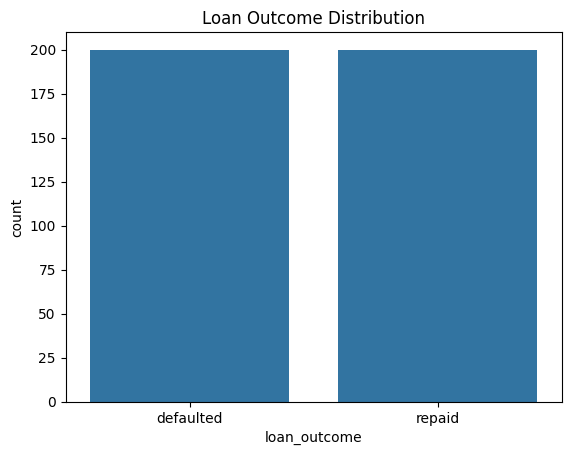

In [169]:
sns.countplot(x='loan_outcome', data=loan_outcomes)
plt.title('Loan Outcome Distribution')
plt.show()


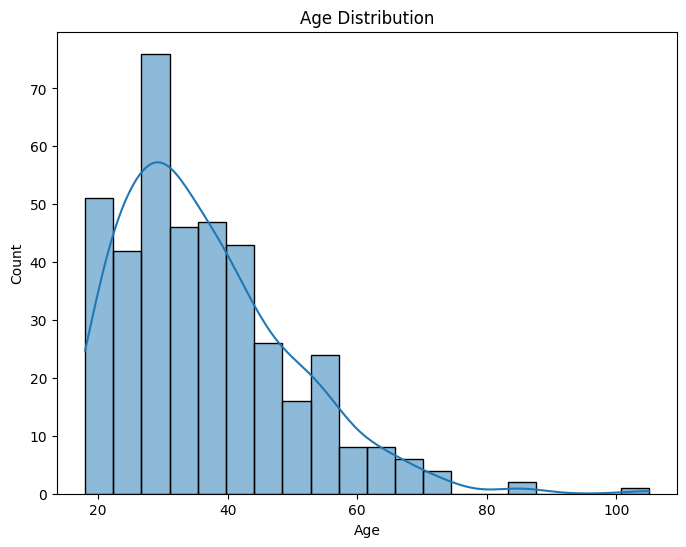

In [170]:
plt.figure(figsize=(8, 6))
sns.histplot(user_attributes['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



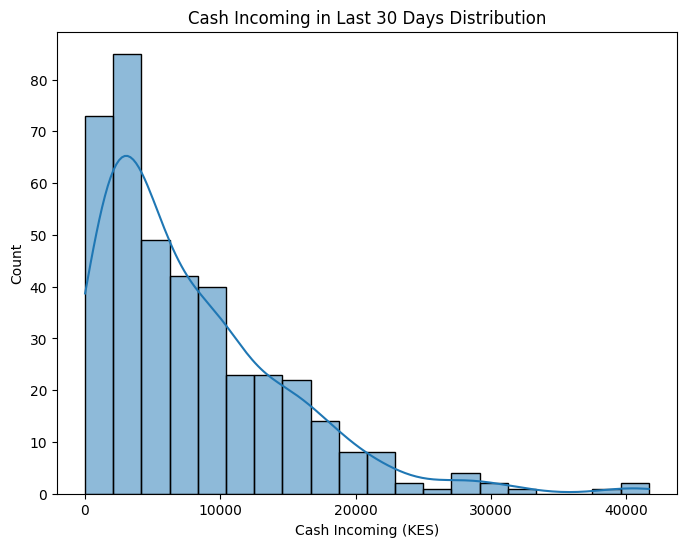

In [171]:
plt.figure(figsize=(8, 6))
sns.histplot(user_attributes['cash_incoming_30days'], bins=20, kde=True)
plt.title('Cash Incoming in Last 30 Days Distribution')
plt.xlabel('Cash Incoming (KES)')
plt.ylabel('Count')
plt.show()

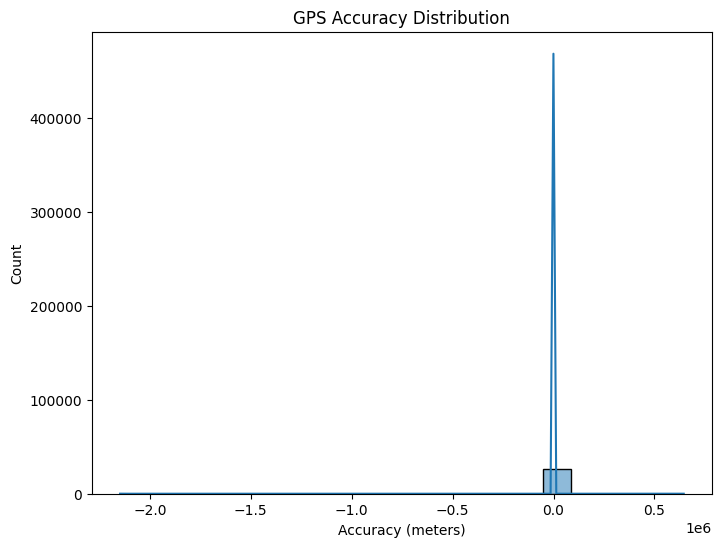

In [172]:
plt.figure(figsize=(8, 6))
sns.histplot(gps_fixes['accuracy'], bins=20, kde=True)
plt.title('GPS Accuracy Distribution')
plt.xlabel('Accuracy (meters)')
plt.ylabel('Count')
plt.show()

In [173]:
merged_data = pd.merge(loan_outcomes, user_attributes, on='user_id', how='left')

In [174]:
merged_data['loan_outcome_numeric'] = merged_data['loan_outcome'].map({'repaid': 1, 'defaulted': 0})

In [175]:
# View the first few rows
print(loan_outcomes.head())
print(gps_fixes.head())
print(user_attributes.head())

# Check for missing values
print(loan_outcomes.isnull().sum())
print(gps_fixes.isnull().sum())
print(user_attributes.isnull().sum())

# Data types
print(loan_outcomes.dtypes)
print(gps_fixes.dtypes)
print(user_attributes.dtypes)

   user_id             application_at loan_outcome
0        1 2017-08-14 09:08:50.000000    defaulted
1        2 2016-05-17 10:10:12.447976       repaid
2        3 2016-10-20 10:07:20.459081    defaulted
3        4 2017-01-13 13:03:34.000000    defaulted
4        5 2016-11-03 15:41:39.124610       repaid
           gps_fix_at    server_upload_at  longitude  latitude  accuracy  \
0 2017-06-22 09:37:20 2017-06-22 09:43:42  36.840540 -1.294342      68.4   
1 2017-08-14 07:50:27 2017-08-14 09:05:27  36.895270 -1.341928    1409.0   
2 2017-06-13 10:34:29 2017-06-13 10:54:48  36.811903 -1.307220      68.4   
3 2017-06-18 12:16:20 2017-06-18 12:16:24  36.907049 -1.309984    1581.0   
4 2017-06-28 09:39:08 2017-06-28 09:58:12  36.839396 -1.280310    1396.0   

   altitude  bearing location_provider  user_id  
0       0.0      0.0             fused        1  
1       0.0      0.0             fused        1  
2       0.0      0.0             fused        1  
3       0.0      0.0             fuse

In [176]:
# Convert timestamps
loan_outcomes['application_at'] = pd.to_datetime(loan_outcomes['application_at'])
gps_fixes['gps_fix_at'] = pd.to_datetime(gps_fixes['gps_fix_at'])
gps_fixes['server_upload_at'] = pd.to_datetime(gps_fixes['server_upload_at'])

In [177]:
# Merge datasets
data = pd.merge(loan_outcomes, user_attributes, on='user_id', how='left')

In [178]:
# Number of GPS fixes per user
gps_counts = gps_fixes.groupby('user_id').size().reset_index(name='gps_fix_count')

# Average accuracy per user
gps_accuracy = gps_fixes.groupby('user_id')['accuracy'].mean().reset_index(name='avg_accuracy')

# Merge GPS features
gps_features = pd.merge(gps_counts, gps_accuracy, on='user_id', how='left')

# Merge with main data
data = pd.merge(data, gps_features, on='user_id', how='left')

In [179]:
# Day of the week and hour of application
data['application_dayofweek'] = data['application_at'].dt.dayofweek
data['application_hour'] = data['application_at'].dt.hour

In [180]:
# Encode target variable
data['loan_outcome'] = data['loan_outcome'].map({'repaid': 1, 'defaulted': 0})

In [181]:
# Fill missing GPS fix counts with 0
data['gps_fix_count'] = data['gps_fix_count'].fillna(0)
data['avg_accuracy'] = data['avg_accuracy'].fillna(data['avg_accuracy'].mean())

In [182]:
# Feature selection
features = ['age', 'cash_incoming_30days', 'gps_fix_count', 'avg_accuracy', 'application_dayofweek', 'application_hour']

X = data[features]
y = data['loan_outcome']

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [186]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
# y_test = nb_model.predict(X_test)

GaussianNB()

Accuracy: 0.62
              precision    recall  f1-score   support

           0       0.56      0.89      0.69        37
           1       0.81      0.40      0.53        43

    accuracy                           0.62        80
   macro avg       0.68      0.64      0.61        80
weighted avg       0.69      0.62      0.60        80

ROC AUC Score: 0.70


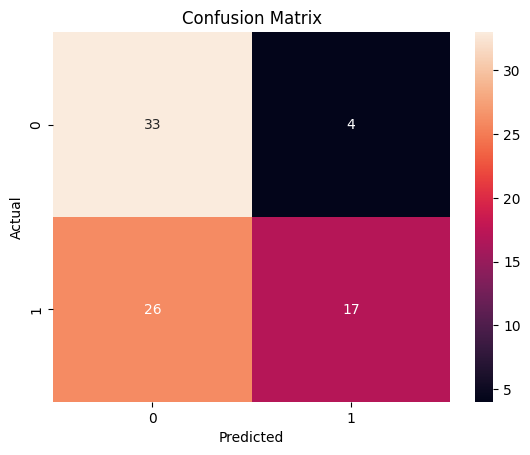

In [187]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc:.2f}')

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
